In [1]:
DATA_PATH = "Data/training_set/"

# Packages

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pickle

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

from sklearn.metrics import precision_recall_curve

2021-11-15 13:38:25.516925: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
n_classes = 3

# Load Masks and Predictions

In [4]:
ids = next(os.walk(f"{DATA_PATH}mask_tiles/reconstructed/"))[2]
print("No. of images = ", len(ids))

No. of images =  7


In [5]:
def load_true_and_pred(ids,d,sigma):
    y_true = np.array([])
    y_pred = np.array([])
    
    n = 0
    for i in ids:
        #print(i)
        #y_true-------------
        img_true = cv.imread(f"{DATA_PATH}mask_tiles/reconstructed/{i}",0)
        le = LabelEncoder()
        img_true = img_true.flatten()
        img_true = le.fit_transform(img_true)
        img_true = to_categorical(img_true, num_classes=n_classes+1)
        img_true_con = np.zeros((len(img_true),n_classes))
        img_true_con[:,0] = img_true[:,0]
        img_true_con[:,1] = img_true[:,1] + img_true[:,2]
        img_true_con[:,2] = img_true[:,3]
        del img_true
        n += np.shape(img_true_con)[0]
        y_true = np.concatenate((y_true, img_true_con.flatten()))
        #y_pred-------------
        img_pred = cv.imread(f"{DATA_PATH}predicted_reconstructed/{i}")
        w = np.shape(img_pred)[0]
        h = np.shape(img_pred)[1]
        #img_pred = cv.resize(cv.bilateralFilter(cv.resize(img_pred,None,fx = 1/scale,fy = 1/scale, interpolation = cv.INTER_CUBIC),-1,sigma,sigma),(h,w),fx = scale,fy = scale, interpolation = cv.INTER_CUBIC) #Bilateral Smoothing on predicted masks
        img_pred = cv.bilateralFilter(img_pred,d,sigma,sigma)
        img_pred = cv.cvtColor(img_pred.astype(np.uint8()), cv.COLOR_BGR2RGB)
        img_pred = img_pred/255
        y_pred = np.concatenate((y_pred, img_pred.flatten()))

    return y_true.reshape(n,n_classes), y_pred.reshape(n,n_classes)

In [6]:
def find_threshold_and_plot(y_true,y_pred,name_of_variable): 
    #FIND-THRESHOLD-----------------------------------------
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    thresholds = np.append(thresholds,1.0)
    fscore = (2 * precision * recall) / (precision + recall)
    loc = np.argmax(fscore)
    print(f">>>>>{name_of_variable}<<<<<")
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[loc], fscore[loc]))
    #PLOT-F-SCORE-------------------------------------------
    plt.plot(thresholds,fscore)
    plt.scatter(thresholds[loc], fscore[loc], marker='o', color='black', label='Best')
    plt.xlabel("thresholds")
    plt.ylabel("F-Score")
    plt.title(f"Optimal thereshold based on F-Score for {name_of_variable}")
    plt.grid()
    _=plt.legend()
    plt.show()
    #PLOT-PR-CURVE------------------------------------------
    plt.scatter(precision[loc], recall[loc], marker='o', color='black', label='Best')
    plt.plot(precision, recall)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title(f"Precision-Recall Curve for {name_of_variable}")
    plt.grid()
    _=plt.legend()
    plt.show()
    
    return thresholds[loc], fscore[loc]

# Finding the optimal Sigma

##### SIGMA = 0 #####
##### d = 0 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


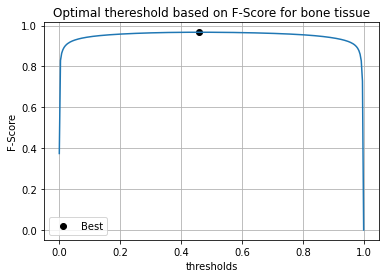

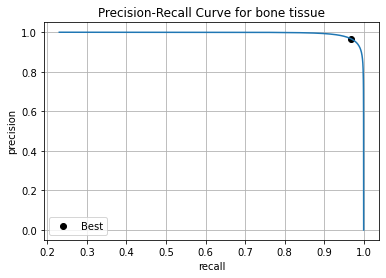

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


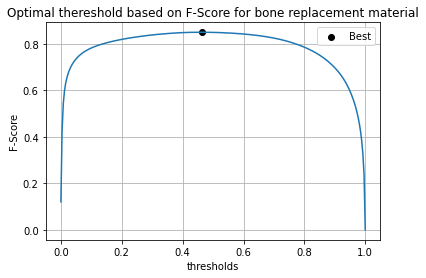

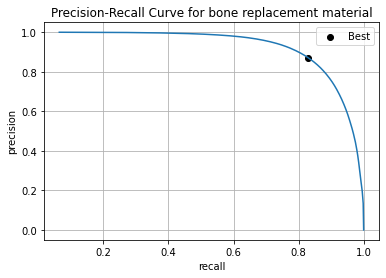

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


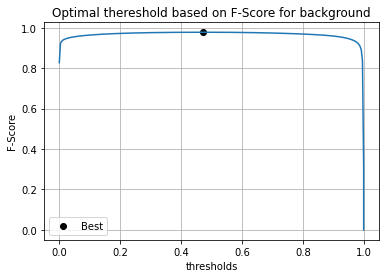

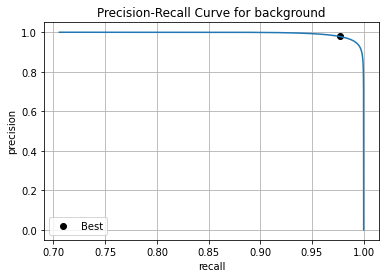

##### d = 16 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


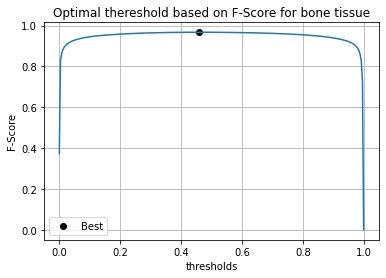

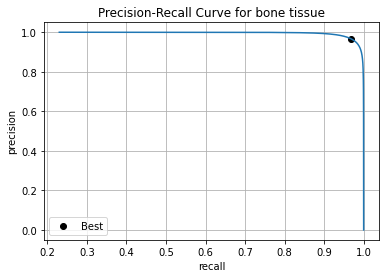

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


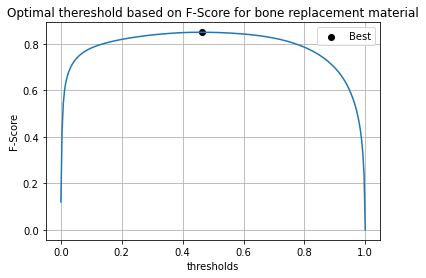

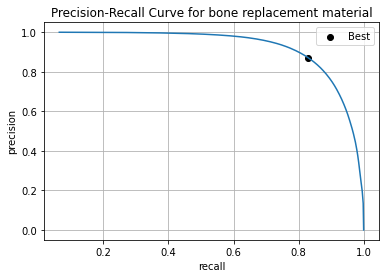

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


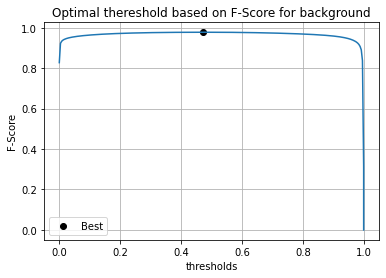

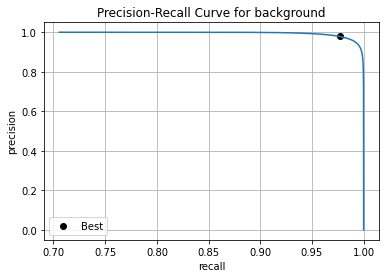

##### d = 32 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


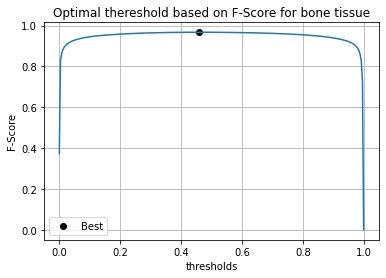

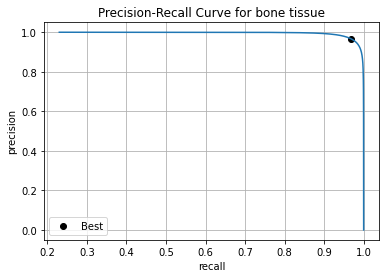

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


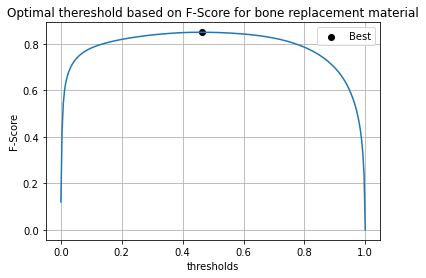

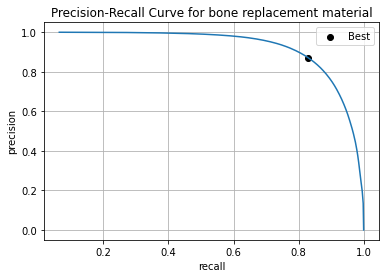

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


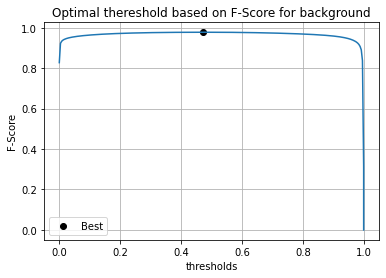

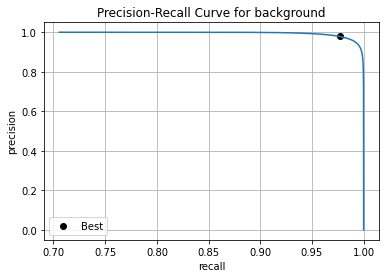

##### d = 64 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


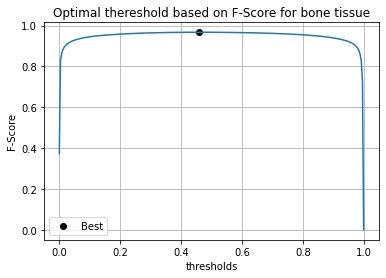

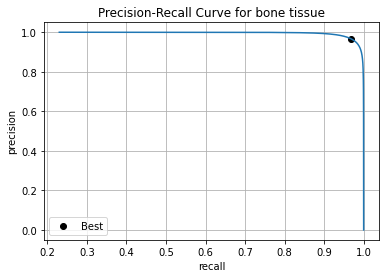

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


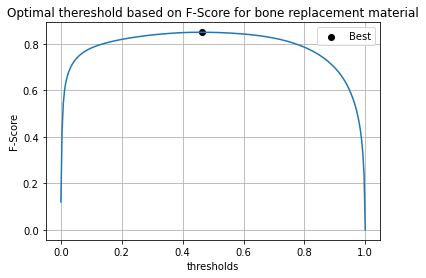

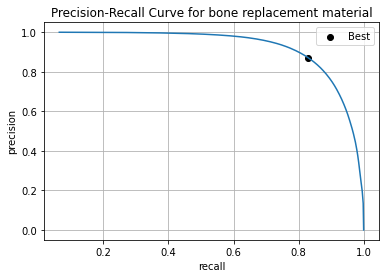

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


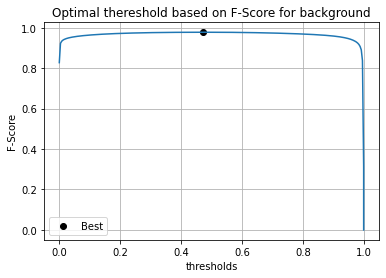

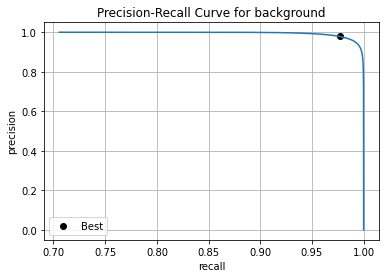

##### d = 128 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


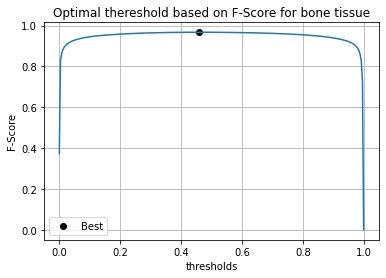

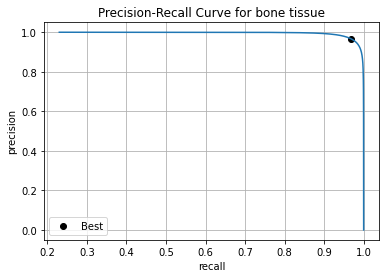

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


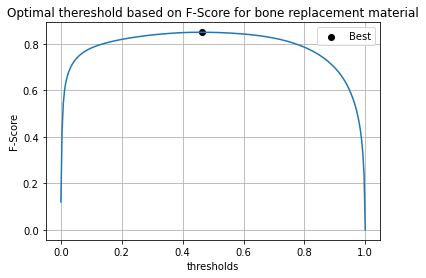

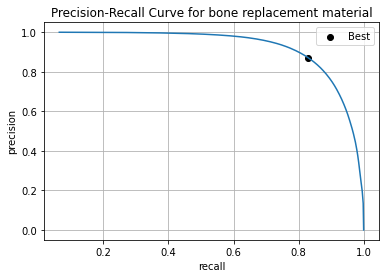

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


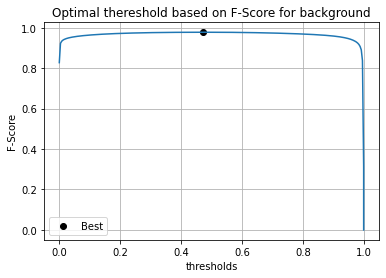

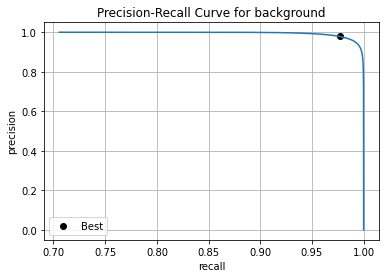

##### d = 255 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.967


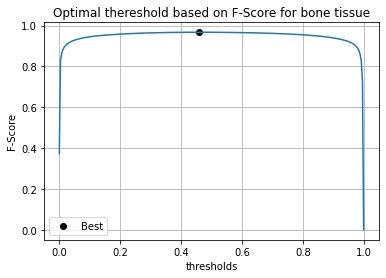

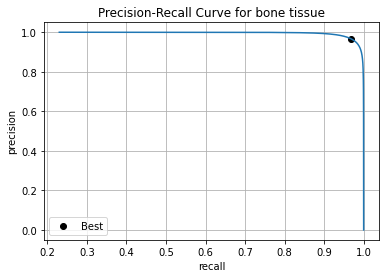

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


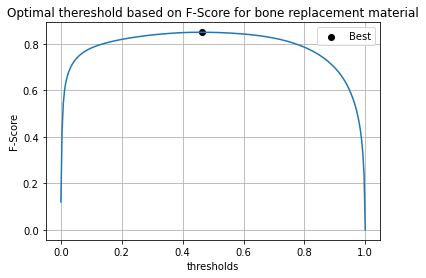

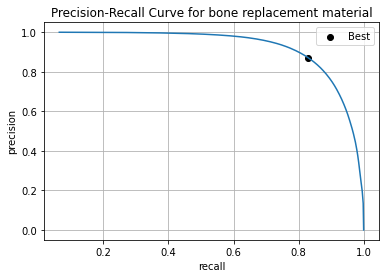

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


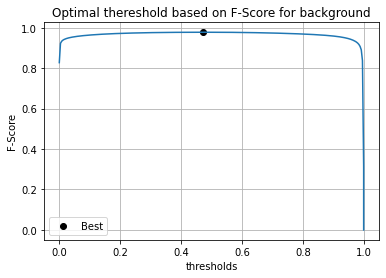

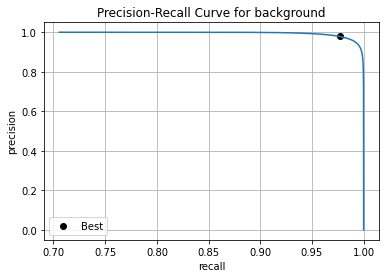

##### SIGMA = 64 #####
##### d = 0 #####
>>>>>bone tissue<<<<<
Best Threshold=0.454902, F-Score=0.968


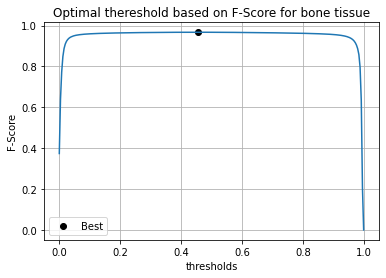

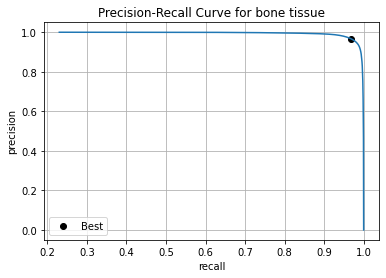

>>>>>bone replacement material<<<<<
Best Threshold=0.458824, F-Score=0.850


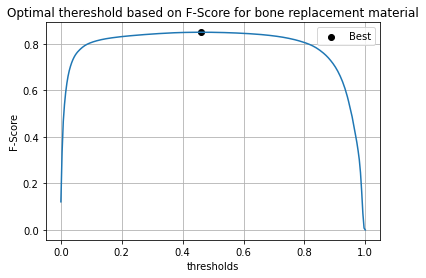

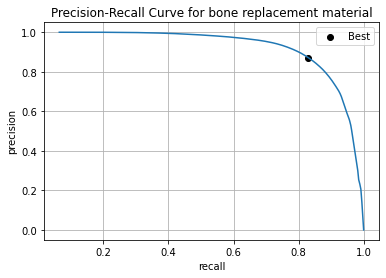

>>>>>background<<<<<
Best Threshold=0.462745, F-Score=0.978


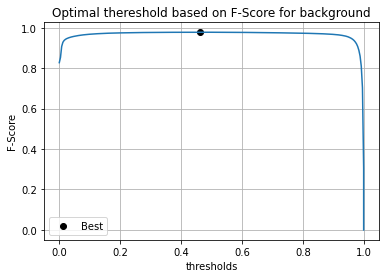

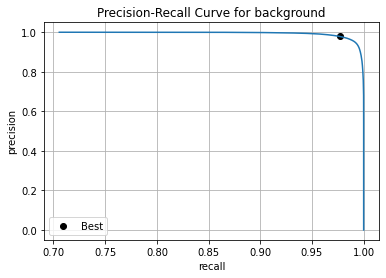

##### d = 16 #####
>>>>>bone tissue<<<<<
Best Threshold=0.450980, F-Score=0.968


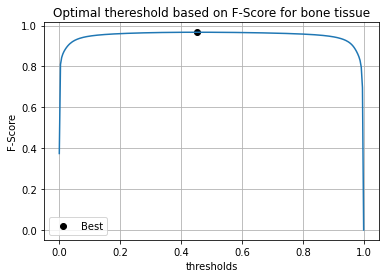

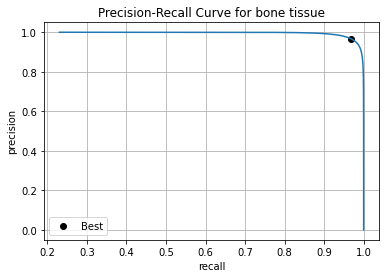

>>>>>bone replacement material<<<<<
Best Threshold=0.458824, F-Score=0.850


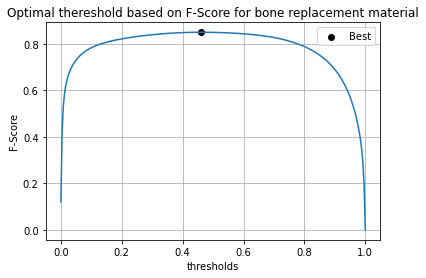

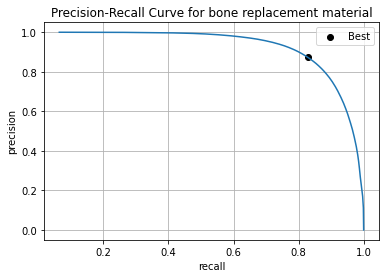

>>>>>background<<<<<
Best Threshold=0.462745, F-Score=0.978


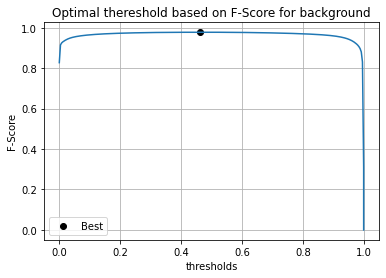

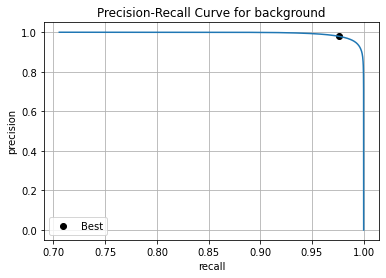

##### d = 32 #####
>>>>>bone tissue<<<<<
Best Threshold=0.447059, F-Score=0.968


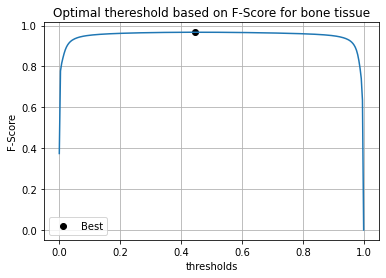

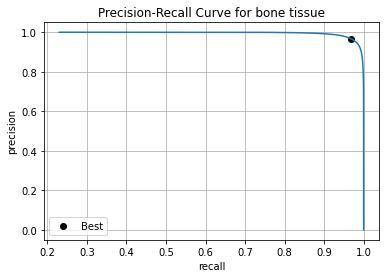

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


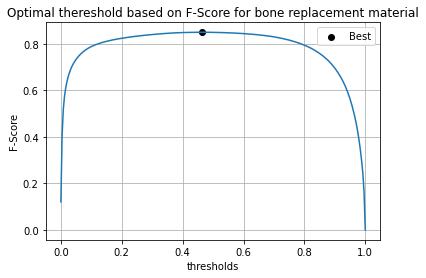

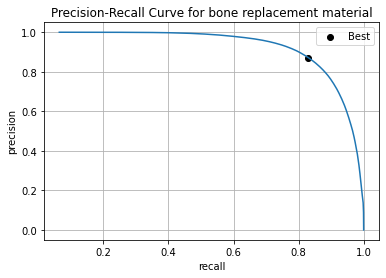

>>>>>background<<<<<
Best Threshold=0.462745, F-Score=0.978


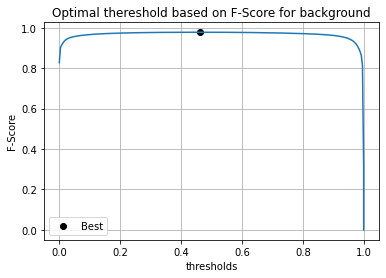

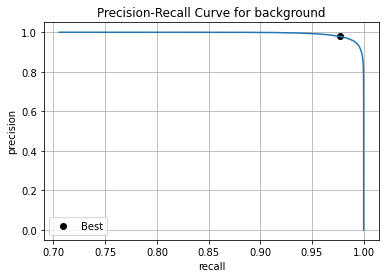

##### d = 64 #####
>>>>>bone tissue<<<<<
Best Threshold=0.454902, F-Score=0.968


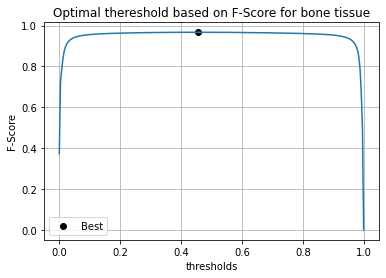

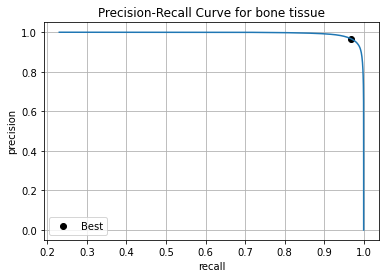

>>>>>bone replacement material<<<<<
Best Threshold=0.470588, F-Score=0.850


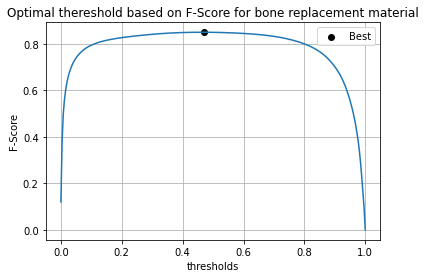

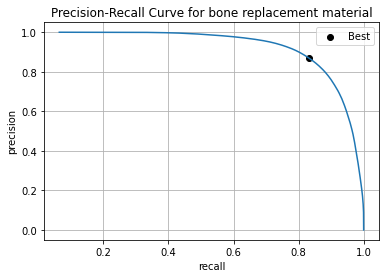

>>>>>background<<<<<
Best Threshold=0.454902, F-Score=0.978


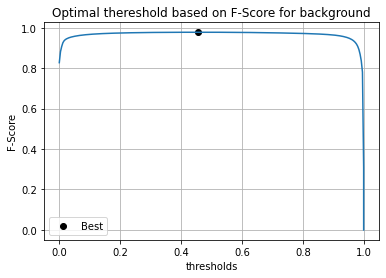

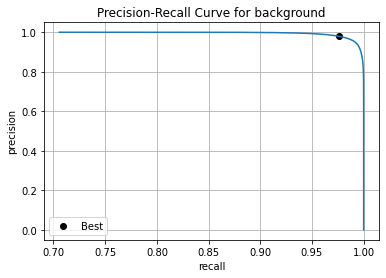

##### d = 128 #####
>>>>>bone tissue<<<<<
Best Threshold=0.450980, F-Score=0.968


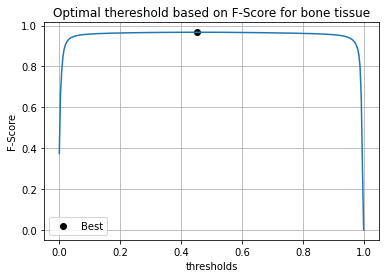

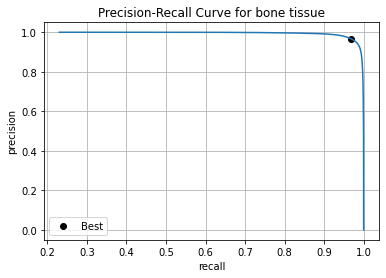

>>>>>bone replacement material<<<<<
Best Threshold=0.466667, F-Score=0.850


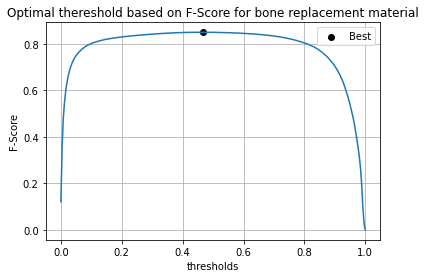

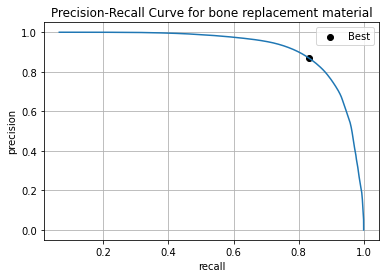

>>>>>background<<<<<
Best Threshold=0.458824, F-Score=0.978


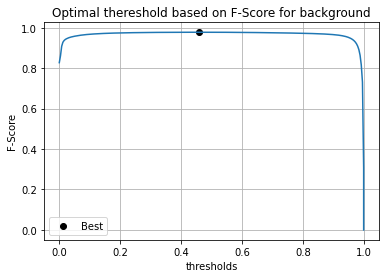

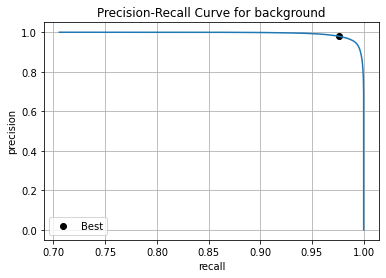

##### d = 255 #####
>>>>>bone tissue<<<<<
Best Threshold=0.450980, F-Score=0.968


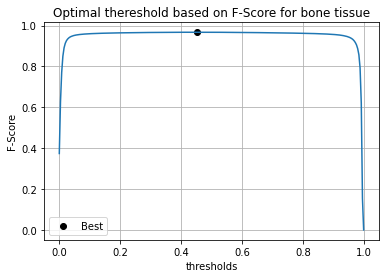

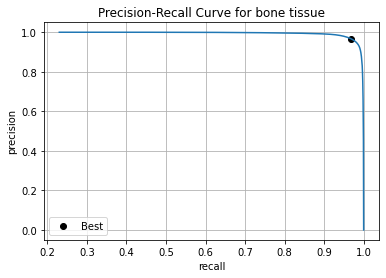

>>>>>bone replacement material<<<<<
Best Threshold=0.454902, F-Score=0.850


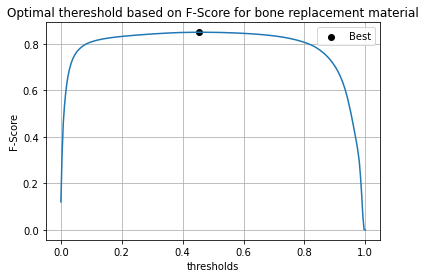

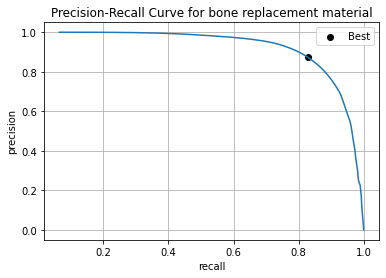

>>>>>background<<<<<
Best Threshold=0.466667, F-Score=0.978


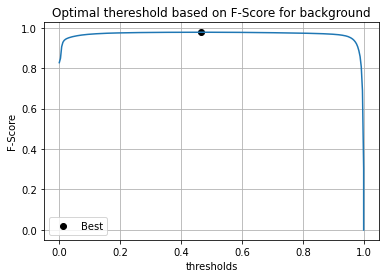

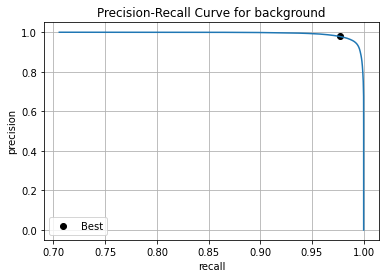

##### SIGMA = 128 #####
##### d = 0 #####
>>>>>bone tissue<<<<<
Best Threshold=0.372549, F-Score=0.967


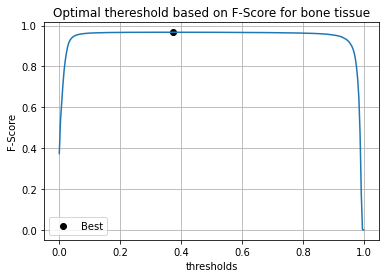

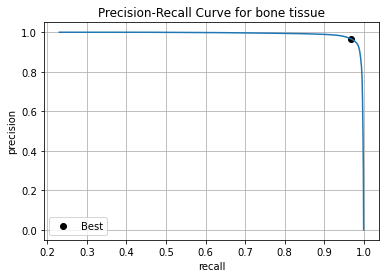

>>>>>bone replacement material<<<<<
Best Threshold=0.407843, F-Score=0.849


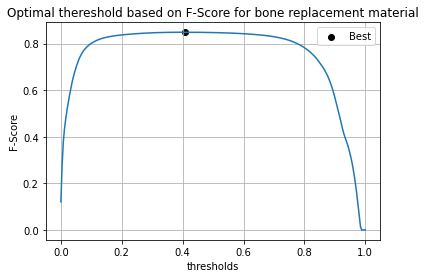

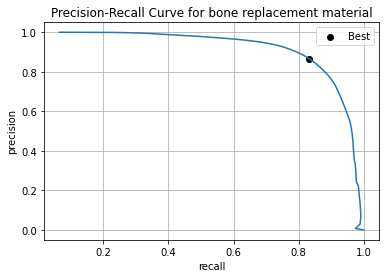

>>>>>background<<<<<
Best Threshold=0.482353, F-Score=0.978


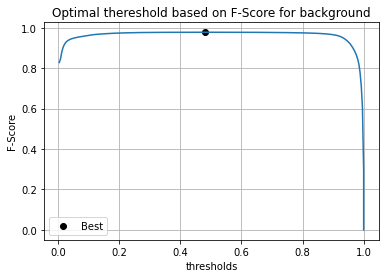

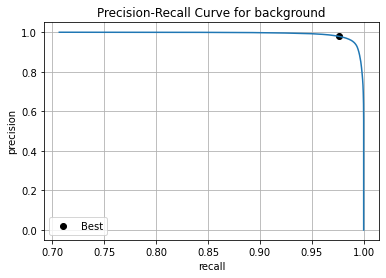

##### d = 16 #####
>>>>>bone tissue<<<<<
Best Threshold=0.462745, F-Score=0.968


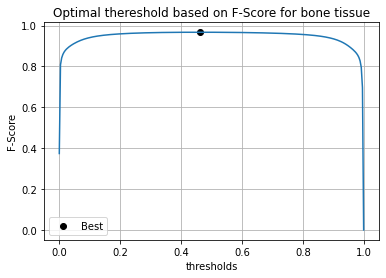

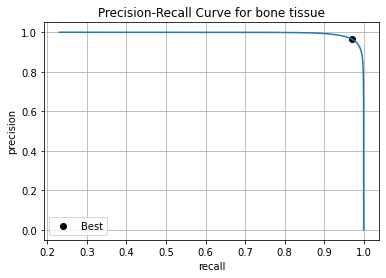

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.850


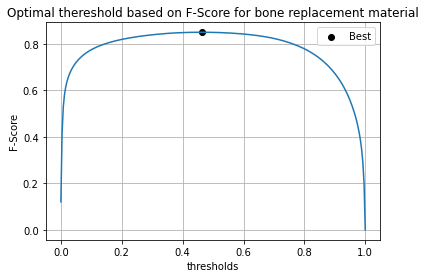

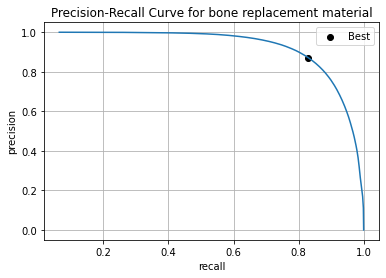

>>>>>background<<<<<
Best Threshold=0.466667, F-Score=0.978


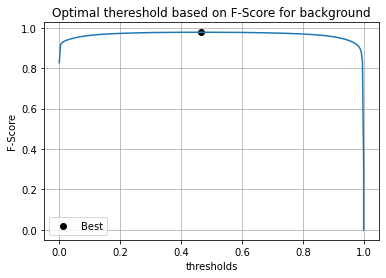

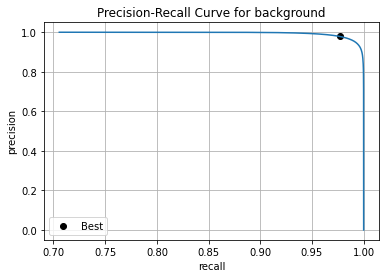

##### d = 32 #####
>>>>>bone tissue<<<<<
Best Threshold=0.466667, F-Score=0.968


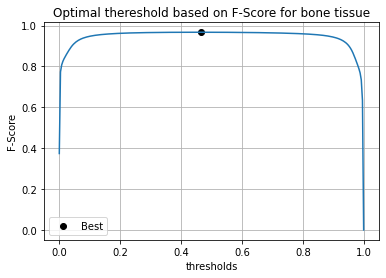

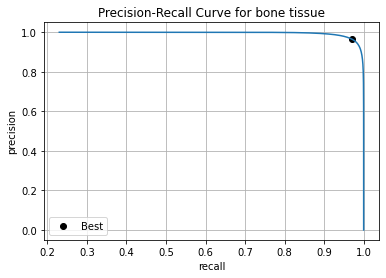

>>>>>bone replacement material<<<<<
Best Threshold=0.462745, F-Score=0.849


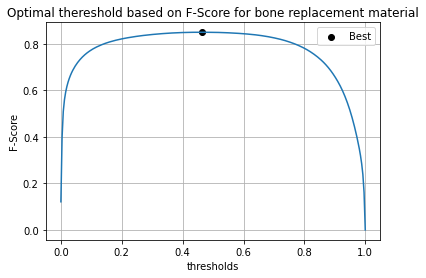

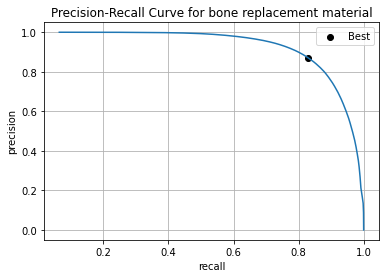

>>>>>background<<<<<
Best Threshold=0.454902, F-Score=0.978


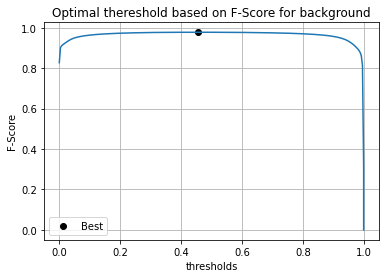

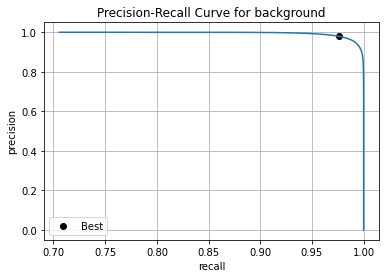

##### d = 64 #####
>>>>>bone tissue<<<<<
Best Threshold=0.439216, F-Score=0.968


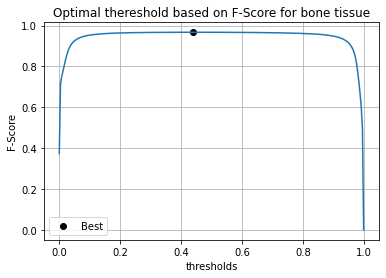

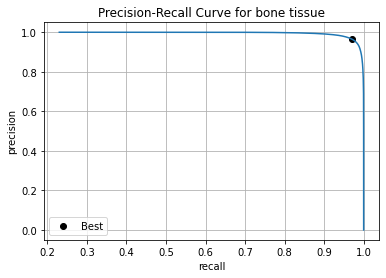

>>>>>bone replacement material<<<<<
Best Threshold=0.474510, F-Score=0.849


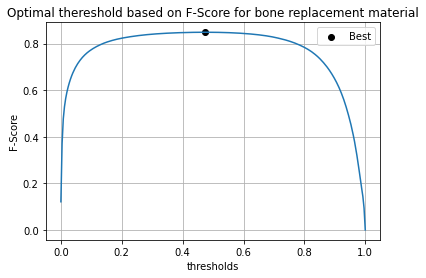

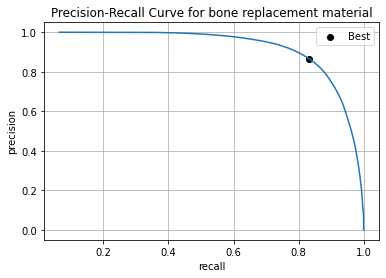

>>>>>background<<<<<
Best Threshold=0.450980, F-Score=0.978


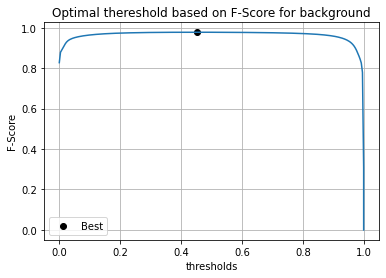

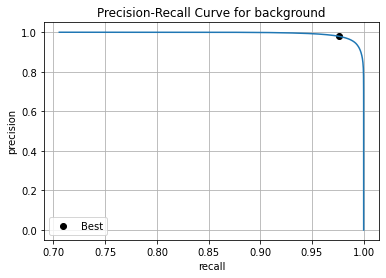

##### d = 128 #####
>>>>>bone tissue<<<<<
Best Threshold=0.419608, F-Score=0.968


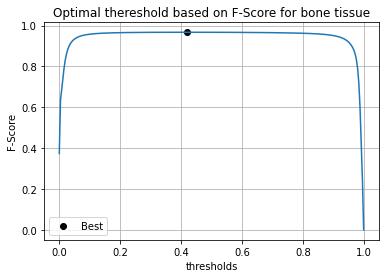

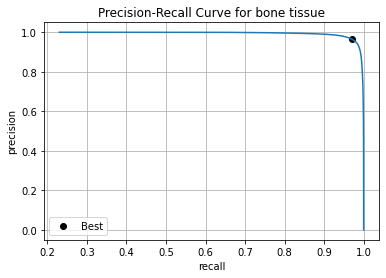

>>>>>bone replacement material<<<<<
Best Threshold=0.458824, F-Score=0.848


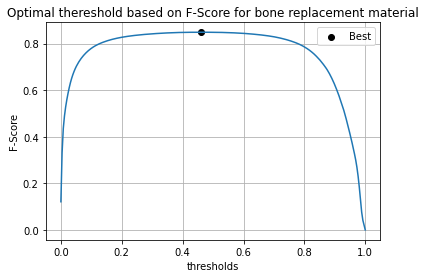

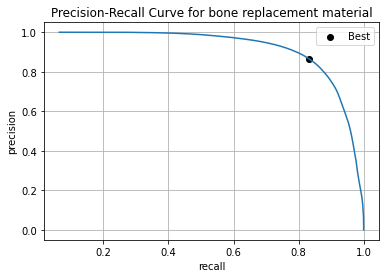

>>>>>background<<<<<
Best Threshold=0.454902, F-Score=0.978


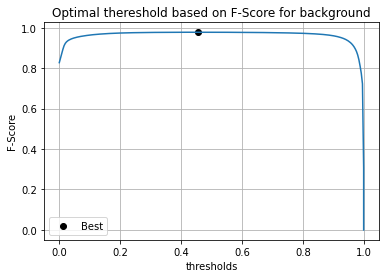

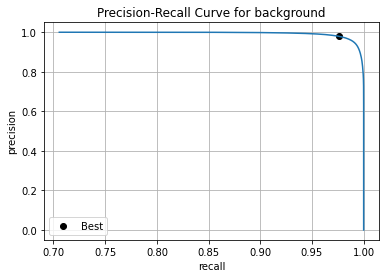

##### d = 255 #####
>>>>>bone tissue<<<<<
Best Threshold=0.372549, F-Score=0.967


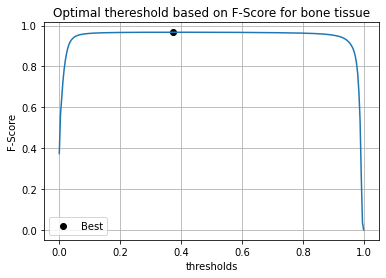

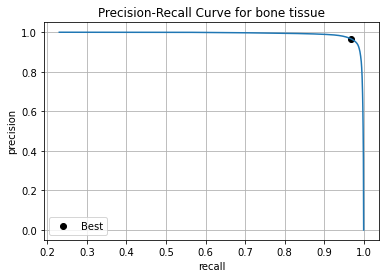

>>>>>bone replacement material<<<<<
Best Threshold=0.431373, F-Score=0.848


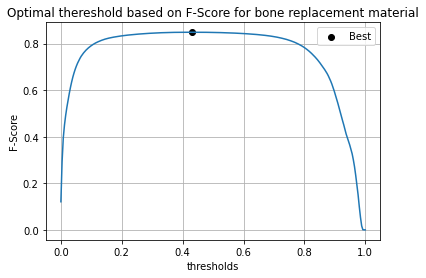

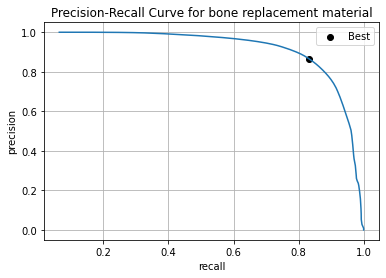

>>>>>background<<<<<
Best Threshold=0.474510, F-Score=0.978


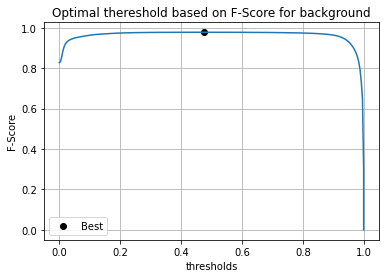

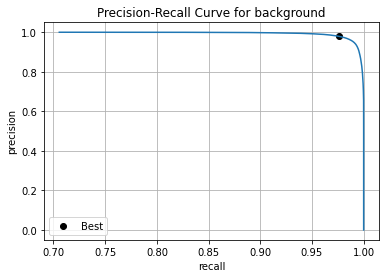

##### SIGMA = 192 #####
##### d = 0 #####
>>>>>bone tissue<<<<<
Best Threshold=0.349020, F-Score=0.966


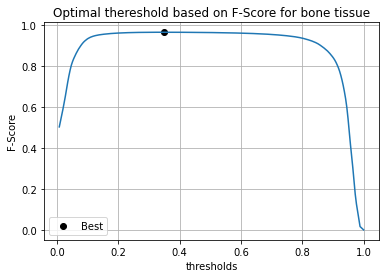

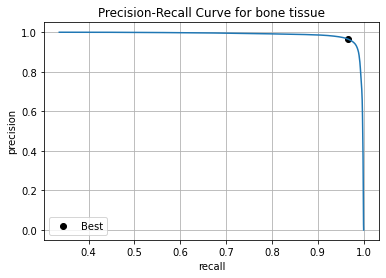

>>>>>bone replacement material<<<<<
Best Threshold=0.321569, F-Score=0.844


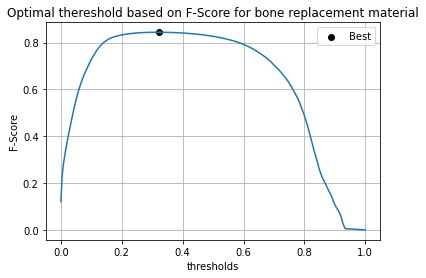

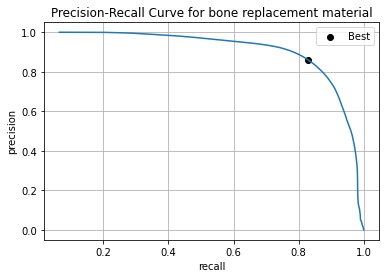

>>>>>background<<<<<
Best Threshold=0.564706, F-Score=0.977


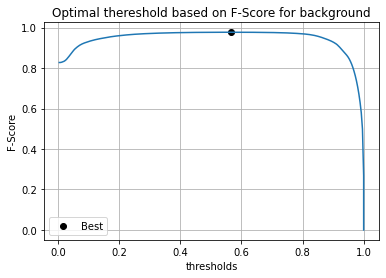

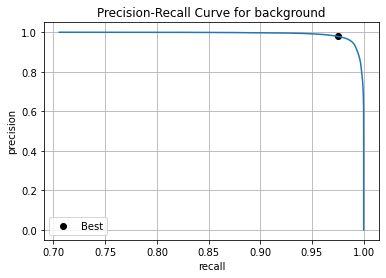

##### d = 16 #####
>>>>>bone tissue<<<<<
Best Threshold=0.458824, F-Score=0.968


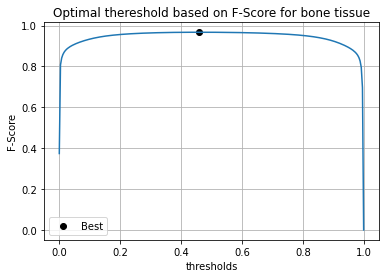

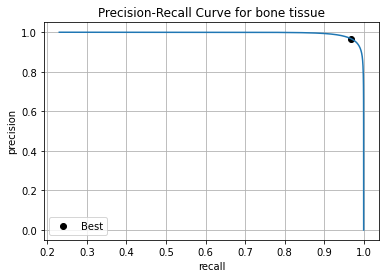

>>>>>bone replacement material<<<<<
Best Threshold=0.458824, F-Score=0.850


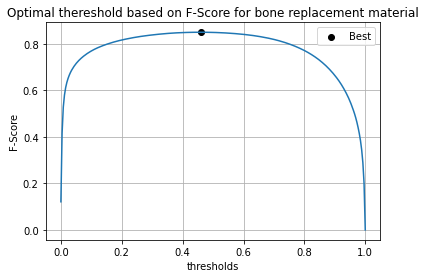

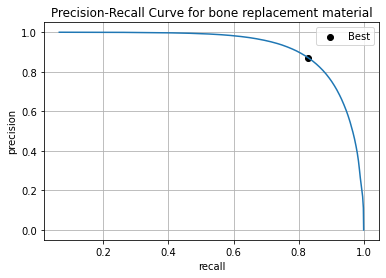

>>>>>background<<<<<
Best Threshold=0.470588, F-Score=0.978


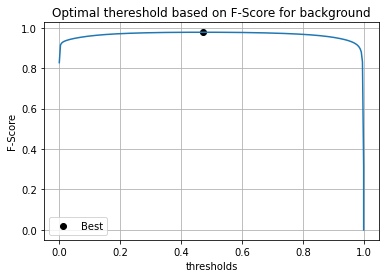

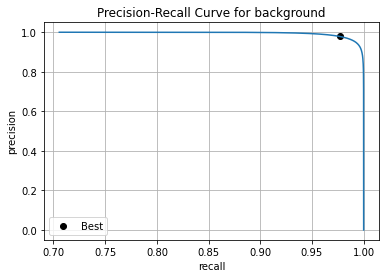

##### d = 32 #####
>>>>>bone tissue<<<<<
Best Threshold=0.454902, F-Score=0.968


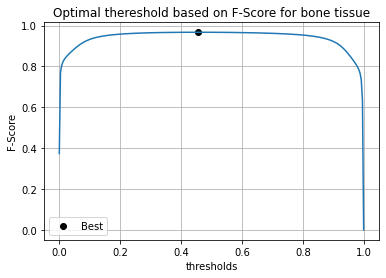

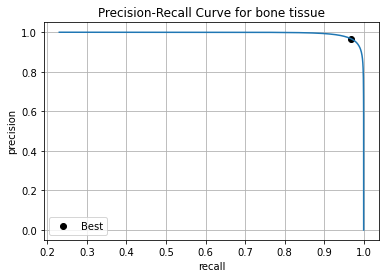

>>>>>bone replacement material<<<<<
Best Threshold=0.454902, F-Score=0.848


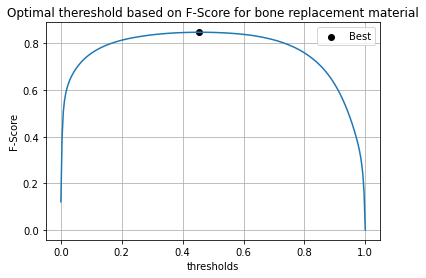

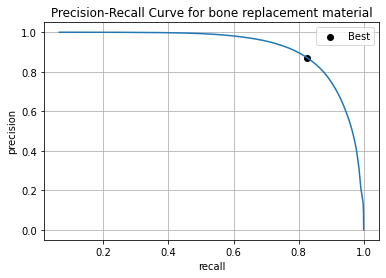

>>>>>background<<<<<
Best Threshold=0.462745, F-Score=0.978


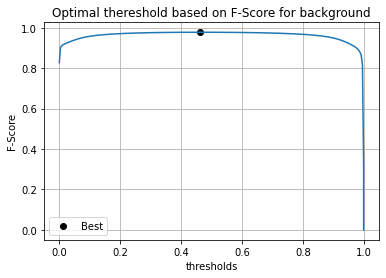

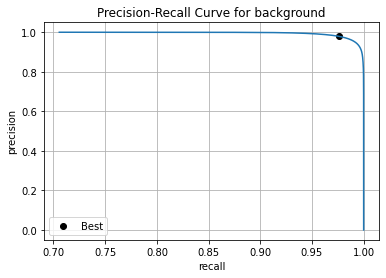

##### d = 64 #####
>>>>>bone tissue<<<<<
Best Threshold=0.439216, F-Score=0.967


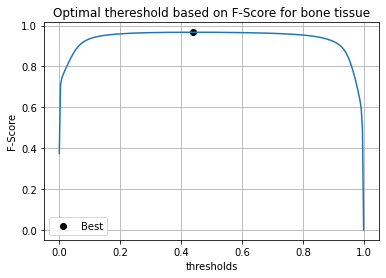

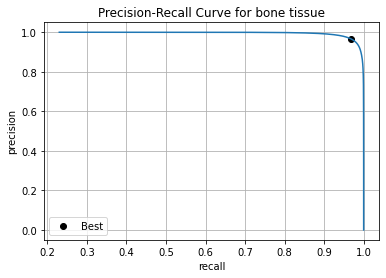

>>>>>bone replacement material<<<<<
Best Threshold=0.466667, F-Score=0.845


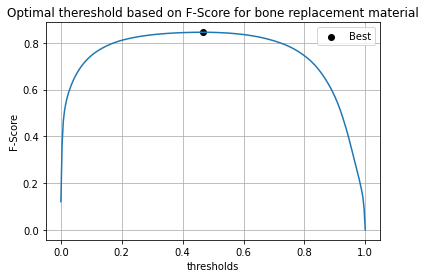

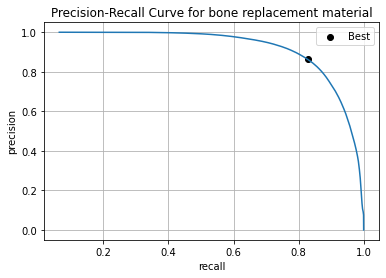

>>>>>background<<<<<
Best Threshold=0.466667, F-Score=0.977


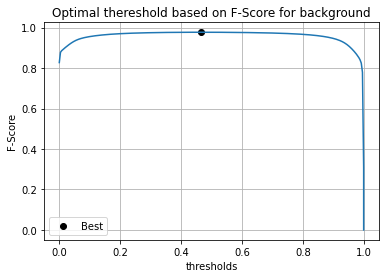

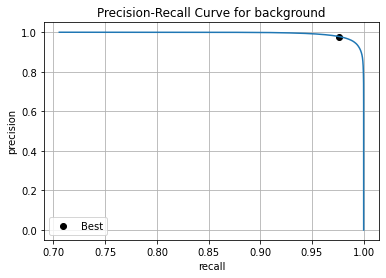

##### d = 128 #####
>>>>>bone tissue<<<<<
Best Threshold=0.419608, F-Score=0.966


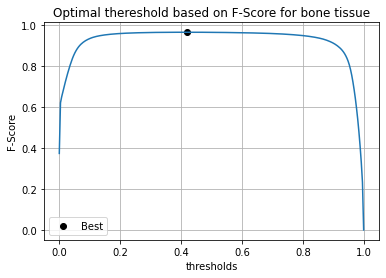

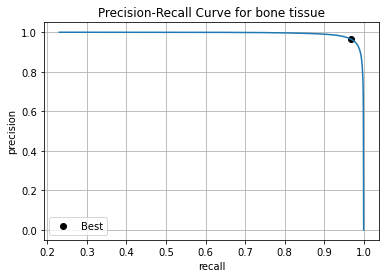

>>>>>bone replacement material<<<<<
Best Threshold=0.435294, F-Score=0.842


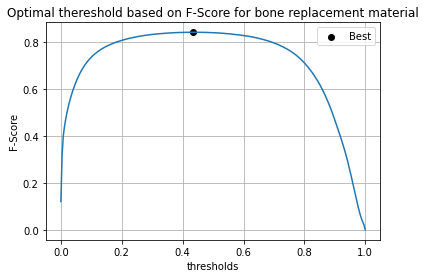

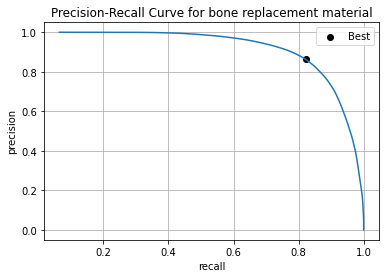

>>>>>background<<<<<
Best Threshold=0.478431, F-Score=0.977


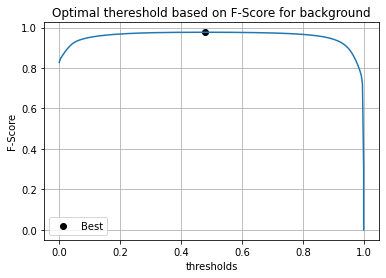

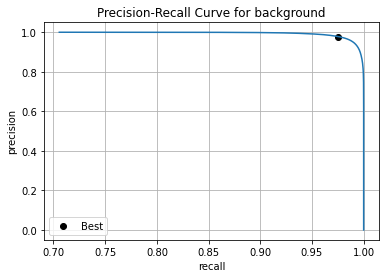

##### d = 255 #####
>>>>>bone tissue<<<<<
Best Threshold=0.384314, F-Score=0.966


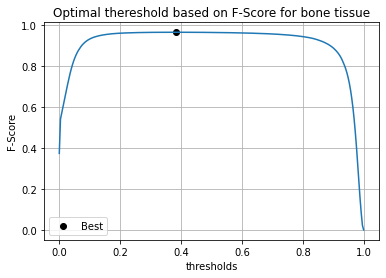

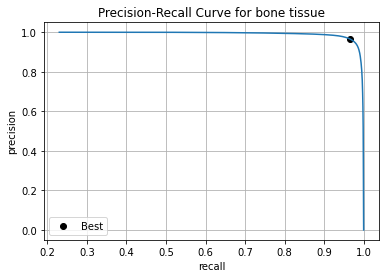

>>>>>bone replacement material<<<<<
Best Threshold=0.392157, F-Score=0.841


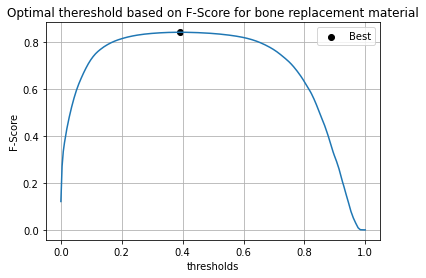

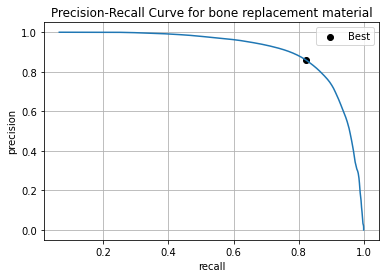

>>>>>background<<<<<
Best Threshold=0.505882, F-Score=0.977


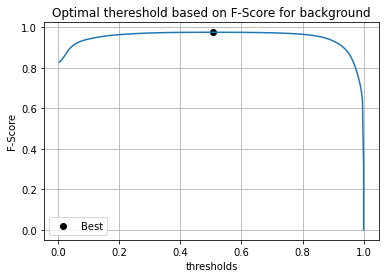

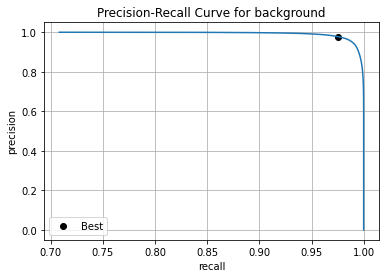

##### SIGMA = 255 #####
##### d = 0 #####


In [ ]:
# Takes about 8 hours to run

thresholds = []
fscores = []

sigmas = [0,64,128,192]
ds = [0,16,32,64,128,255]

for sigma in sigmas:
    print(f"##### SIGMA = {sigma} #####")
    for d in ds:
        print(f"##### d = {d} #####")
        y_true, y_pred = load_true_and_pred(ids,d,sigma)
        ths = []
        fss = []
        t,f = find_threshold_and_plot(y_true[:,0],y_pred[:,0],"bone tissue")
        ths.append(t)
        fss.append(f)
        t,f = find_threshold_and_plot(y_true[:,1],y_pred[:,1],"bone graft material")
        ths.append(t)
        fss.append(f)
        t,f = find_threshold_and_plot(y_true[:,2],y_pred[:,2],"background")
        ths.append(t)
        fss.append(f)
        thresholds.append(ths)
        fscores.append(fss)
        outfile = open(f"{DATA_PATH}fscores.pickle","wb")
        pickle.dump(fscores, outfile)
        outfile.close()
        outfile = open(f"{DATA_PATH}thresholds.pickle","wb")
        pickle.dump(thresholds, outfile)
        outfile.close()
    
thresholds = np.array(thresholds)
fscores = np.array(fscores)
outfile = open(f"{DATA_PATH}fscores.pickle","wb")
pickle.dump(fscores, outfile)
outfile.close()
outfile = open(f"{DATA_PATH}thresholds.pickle","wb")
pickle.dump(thresholds, outfile)
outfile.close()

In [7]:
infile = open(f"{DATA_PATH}/fscores.pickle","rb")
fscores = pickle.load(infile)
infile.close()
infile = open(f"{DATA_PATH}/thresholds.pickle","rb")
thresholds = pickle.load(infile)
infile.close()

In [8]:
sigmas = [0,64,128,192]
ds = [0,16,32,64,128,255]

In [9]:
best = np.argmax(np.array(fscores)[:,1])
best_score = np.array(fscores)[best,1]

In [10]:
from matplotlib import cm

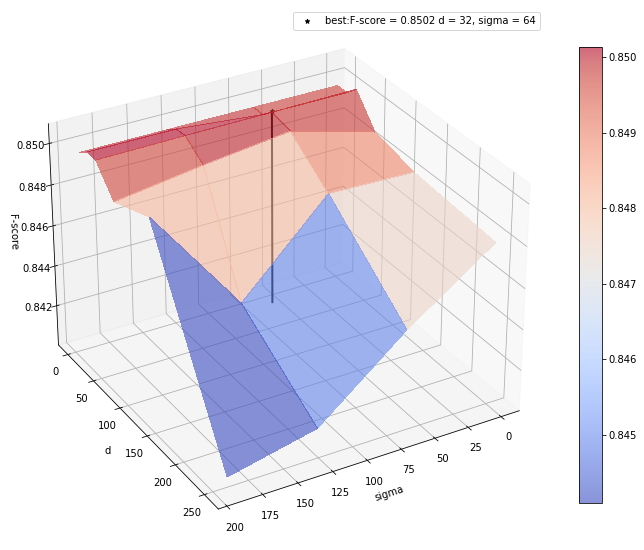

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(12)
fig.set_figwidth(12)

# Make data.
X, Y = np.meshgrid(sigmas, ds)

# Plot the surface.
ax.plot(np.ones(20)*64,np.ones(20)*32,np.linspace(min(np.array(fscores)[:,1]),np.array(fscores)[best,1]+0.000,20),linestyle = "solid",linewidth = 2,marker = "",color = "black")
surf = ax.plot_surface(X, Y, np.array(fscores).reshape((6,4,3))[:,:,1],cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.6)
ax.scatter(64,32,np.array(fscores)[best,1]+0.000,marker = "*",color = "black",label = f"Best: F-score = {round(best_score,4)}, d = 32, sigma = 64")

ax.view_init(30, 60)
fig.colorbar(surf,shrink=0.7)
ax.legend()
ax.set_xlabel("sigma")
ax.set_ylabel("d")
ax.set_zlabel("F-score")
plt.show()

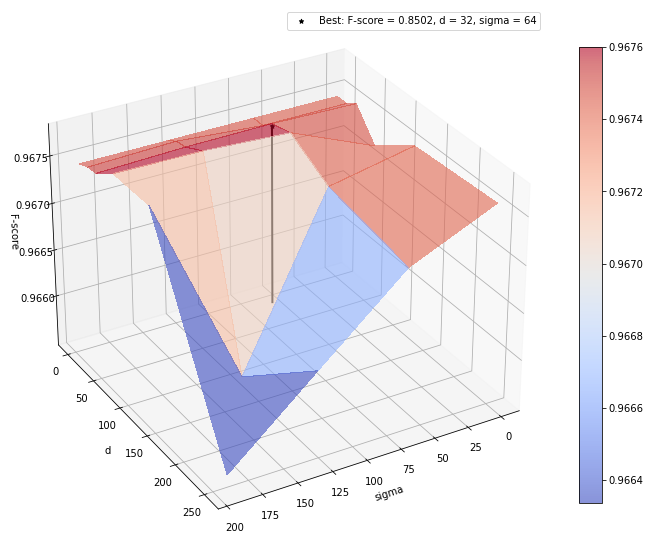

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(12)
fig.set_figwidth(12)

# Make data.
X, Y = np.meshgrid(sigmas, ds)

# Plot the surface.
ax.plot(np.ones(20)*64,np.ones(20)*32,np.linspace(min(np.array(fscores)[:,0]),np.array(fscores)[best,0]+0.000,20),linestyle = "solid",linewidth = 2,marker = "",color = "black")
surf = ax.plot_surface(X, Y, np.array(fscores).reshape((6,4,3))[:,:,0],cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.6)
ax.scatter(64,32,np.array(fscores)[best,0]+0.000,marker = "*",color = "black",label = f"Best: F-score = {round(best_score,4)}, d = 32, sigma = 64")

ax.view_init(30, 60)
fig.colorbar(surf,shrink=0.7)
ax.legend()
ax.set_xlabel("sigma")
ax.set_ylabel("d")
ax.set_zlabel("F-score")
plt.show()

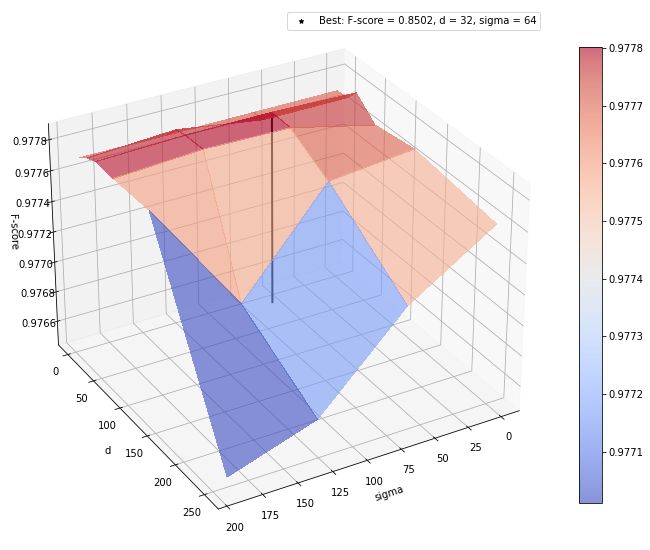

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(12)
fig.set_figwidth(12)

# Make data.
X, Y = np.meshgrid(sigmas, ds)

# Plot the surface.
ax.plot(np.ones(20)*64,np.ones(20)*32,np.linspace(min(np.array(fscores)[:,2]),np.array(fscores)[best,2]+0.000,20),linestyle = "solid",linewidth = 2,marker = "",color = "black")
surf = ax.plot_surface(X, Y, np.array(fscores).reshape((6,4,3))[:,:,2],cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.6)
ax.scatter(64,32,np.array(fscores)[best,2]+0.000,marker = "*",color = "black",label = f"Best: F-score = {round(best_score,4)}, d = 32, sigma = 64")

ax.view_init(30, 60)
fig.colorbar(surf,shrink=0.7)
ax.legend()
ax.set_xlabel("sigma")
ax.set_ylabel("d")
ax.set_zlabel("F-score")
plt.show()

In [16]:
names = ["bone tissue","bone graft material","non-mineralized tissue"]
outtext = ""
for i in range(3):
    print(f"Best F-score for {names[i]}: {np.array(fscores)[best,i]} with threshold = {np.array(thresholds)[best,i]}")
    outtext += (str(np.array(thresholds)[best,i])+"\n")
outfile = open(f"threshold.dat","w")
outfile.write(outtext[:-1])
outfile.close()

Best F-score for bone tissue: 0.9675312270293147 with threshold = 0.4470588235294118
Best F-score for bone replacement material: 0.850241779968956 with threshold = 0.4627450980392157
Best F-score for background: 0.9777852419699159 with threshold = 0.4627450980392157


>>>>>bone tissue<<<<<
Best Threshold=0.447059, F-Score=0.968


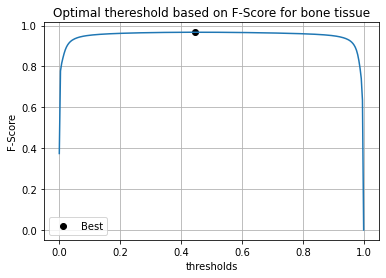

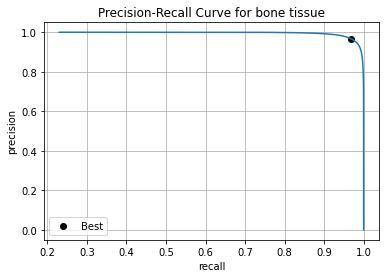

>>>>>bone graft material<<<<<
Best Threshold=0.462745, F-Score=0.850


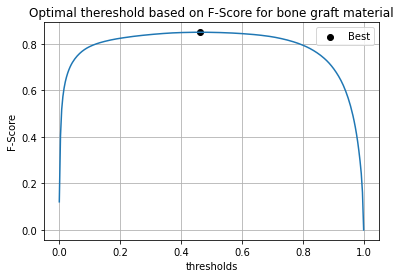

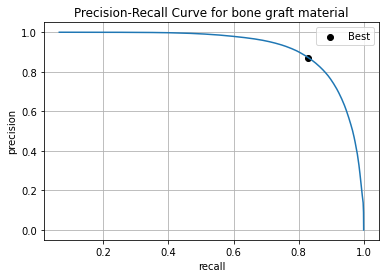

>>>>>non-mineralized tissue<<<<<
Best Threshold=0.462745, F-Score=0.978


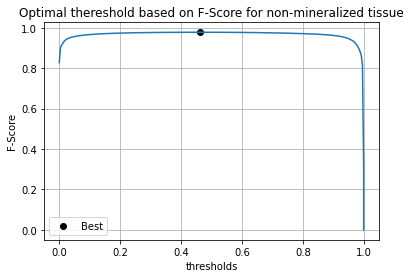

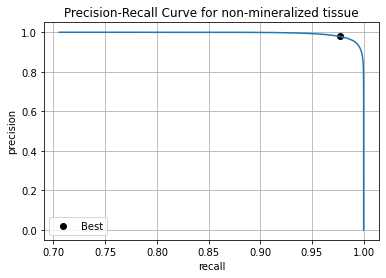

(0.4627450980392157, 0.9777852419699159)

In [7]:
y_true, y_pred = load_true_and_pred(ids,32,64)
find_threshold_and_plot(y_true[:,0],y_pred[:,0],"bone tissue")
find_threshold_and_plot(y_true[:,1],y_pred[:,1],"bone graft material")
find_threshold_and_plot(y_true[:,2],y_pred[:,2],"non-mineralized tissue")

As long as all thresholds are above 1/3 instead of actually thresholding, using np.argmax is also sufficient. (And considerably faster!)

# Thresholding the training images

In [3]:
def thresholding(filename,scale):
    img = cv.imread(filename)
    w = np.shape(img)[0]
    h = np.shape(img)[1]
    img = cv.resize(cv.bilateralFilter(cv.resize(img,None,fx = 1/scale,fy = 1/scale, interpolation = cv.INTER_CUBIC),-1,50,50),(h,w),fx = scale,fy = scale, interpolation = cv.INTER_CUBIC) #Bilateral Smoothing on predicted masks
    img_t = 1-(np.argmax(img, axis = 2))/2
    cv.imwrite(f"{DATA_PATH}predicted_thresholded/{i}",img_t*255)
    plt.imshow(img_t,"gray")
    plt.show()

  0%|                                                                                             | 0/7 [00:00<?, ?it/s]

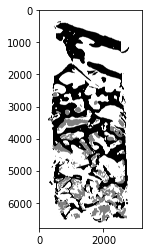

 14%|████████████▏                                                                        | 1/7 [00:42<04:14, 42.34s/it]

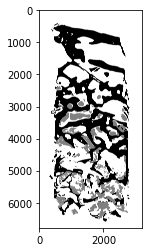

 29%|████████████████████████▎                                                            | 2/7 [01:23<03:28, 41.67s/it]

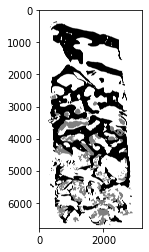

 43%|████████████████████████████████████▍                                                | 3/7 [02:03<02:43, 40.92s/it]

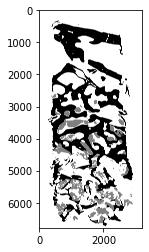

 57%|████████████████████████████████████████████████▌                                    | 4/7 [02:43<02:01, 40.47s/it]

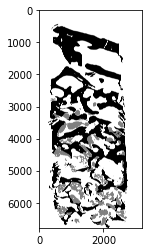

 71%|████████████████████████████████████████████████████████████▋                        | 5/7 [03:24<01:21, 40.69s/it]

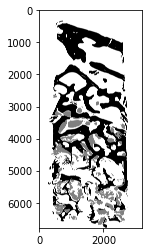

 86%|████████████████████████████████████████████████████████████████████████▊            | 6/7 [04:04<00:40, 40.58s/it]

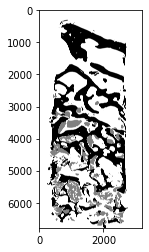

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:45<00:00, 40.84s/it]


In [6]:
for i in tqdm(ids):
    thresholding(f"{DATA_PATH}predicted_reconstructed/{i}",2)